In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
da1 = np.load('embeddings_1.npy')
da2 = np.load('embeddings_2.npy')

In [2]:
da_all = np.vstack([da1,da2])
da_all.shape

(198982, 1024)

In [3]:
labels1 = pd.read_csv('icd_codes_1.txt',header = None)
labels1 = labels1[0].str.split(';')

In [4]:
labels2 = pd.read_csv('icd_codes_2.txt',header = None)
labels2 = labels2[0].str.split(';')

In [5]:
labels_all = pd.concat([labels1,labels2],axis = 0)

In [6]:
from collections import Counter
labels_all_tup = pd.Series([tuple(list) for list in labels_all])
## Number of unique multilabels
print(f"The total number of multi labels :{labels_all_tup.size}")
print(f"The number of unique multi labels : {len(labels_all_tup.unique())}")

The total number of multi labels :198982
The number of unique multi labels : 41767


In [7]:
category_count = Counter()
for ml in labels_all_tup:
    for slabel in ml:
        category_count[slabel[0]] +=1
print(category_count)
print(len(category_count))


Counter({'K': 75955, 'J': 70028, 'H': 56721, 'Z': 48099, 'N': 46472, 'M': 34004, 'D': 21300, 'R': 14372, 'L': 11325, 'G': 11017, 'C': 7687, 'E': 5193, 'T': 4906, 'S': 4160, 'Q': 3056, 'F': 2410, 'O': 1853, 'I': 1104, 'B': 516, 'A': 167, 'X': 29, 'W': 17, 'V': 5, 'Y': 5})
24


(0.0, 30.0)

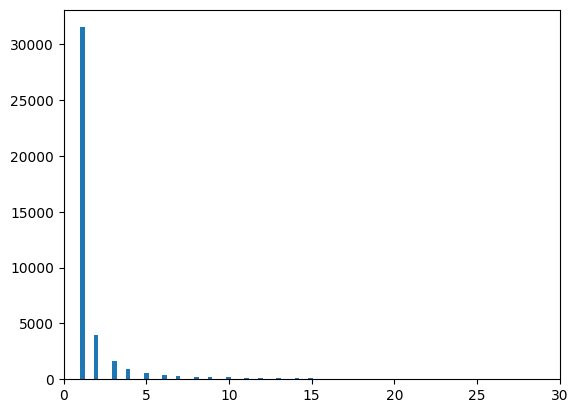

In [8]:
clustering_count = Counter()
for ml in labels_all_tup:
    clustering_count[ml] +=1
    
plt.hist(clustering_count.values(),bins = 10000)
plt.xlim(0,30)

In [9]:
clustering_count

Counter({('J35.01',): 2760,
         ('K40.90',): 2630,
         ('J35.03',): 2212,
         ('H66.93',): 2201,
         ('J35.3',): 1806,
         ('J34.3', 'J34.2'): 1784,
         ('K02.9',): 1729,
         ('O02.1',): 1562,
         ('J34.89', 'J34.3', 'J34.2'): 1450,
         ('J35.3', 'G47.33'): 1447,
         ('H65.33',): 1396,
         ('L72.0',): 1385,
         ('H65.493',): 1354,
         ('N20.0',): 1326,
         ('H65.23',): 1286,
         ('K42.9',): 1250,
         ('K80.10',): 1112,
         ('N62',): 1101,
         ('Z12.11',): 1044,
         ('K02.9', 'F43.0'): 1020,
         ('N20.1',): 929,
         ('N84.0',): 901,
         ('Z30.2',): 885,
         ('N64.82',): 861,
         ('Z31.41',): 861,
         ('K80.20',): 828,
         ('J35.2',): 770,
         ('H25.811',): 766,
         ('Z41.1',): 758,
         ('H25.812',): 746,
         ('K42.0',): 717,
         ('J35.3', 'G47.30'): 710,
         ('N47.1',): 678,
         ('N92.0',): 675,
         ('H40.9',): 674,
   

In [10]:
cnt_many = 0
cnt_single = 0
for key,value in clustering_count.items():
    if value>=2:
        cnt_many +=1
    else:
        cnt_single +=1
print(f"There are {cnt_single} unique multilabels")
print(f"There are {cnt_many} multilabels which hold for more than one embedding")
#There are like 10,234 multilabels which are repeated more than once

There are 31533 unique multilabels
There are 10234 multilabels which hold for more than one embedding


In [11]:
print(np.unique(labels_all_tup).shape)

(41767,)


In [14]:
da_all_uni = np.unique(da_all,axis = 0)
print(f"There are {da_all.shape[0] - da_all_uni.shape[0]} duplicate embeddings")
# There are duplicate embeddings

There are 2457 duplicate embeddings
